<a href="https://colab.research.google.com/github/ranton256/stats_notebooks/blob/main/independent_samples_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Samples T-Test

Abbreviated from "hypothesis test statistic"

### AKA "Student's T-test"

### From Wikipedia

" a statistical test used to test whether the difference between the response of two groups is statistically significant or not."

It is any statistical hypothesis test in which the test statistic follows a [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) under the [null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis).

"...Commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known (typically, the scaling term is unknown and is therefore a nuisance parameter).

"When the scaling term is estimated based on the data, the test statistic—under certain conditions—follows a Student's t distribution.

"The t-test's most common application is to test whether the means of two populations are significantly different. In many cases, a Z-test will yield very similar results to a t-test because the latter converges to the former as the size of the dataset increases. "

<https://en.wikipedia.org/wiki/Student%27s_t-test>

### From https://libguides.library.kent.edu/SPSS/IndependentTTest

"The Independent Samples t Test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test."

- <https://libguides.library.kent.edu/SPSS/IndependentTTest>

Commonly used to test the following:

    Statistical differences between the means of two groups
    Statistical differences between the means of two interventions
    Statistical differences between the means of two change scores



## Assumptions

The data for must meet some requirements for a t-test to be valid (statistically meaningful).

- Independent
- Identically distributed
- Normally distributed
- Equal variance

In more depth, from <https://libguides.library.kent.edu/SPSS/IndependentTTest>:

> Dependent variable that is continuous (i.e., interval or ratio level)
>
> Independent variable that is categorical (i.e., nominal or ordinal) and has exactly two categories
>
> Cases that have nonmissing values for both the dependent and independent variables
>
> Independent samples/groups (i.e., independence of observations)
>
> ​    There is no relationship between the subjects in each sample. This means that:
>
> ​        Subjects in the first group cannot also be in the second group
>
> ​        No subject in either group can influence subjects in the other group
>
> ​        No group can influence the other group
>
> ​    Violation of this assumption will yield an inaccurate p value
>
> Random sample of data from the population
>
> Normal distribution (approximately) of the dependent variable for each group
>
> ​    Non-normal population distributions, especially those that are thick-tailed or heavily skewed, considerably reduce the power of the test
>
> ​    Among moderate or large samples, a violation of normality may still yield accurate p values
>
> Homogeneity of variances (i.e., variances approximately equal across groups)
>
> ​    When this assumption is violated and the sample sizes for each group differ, the p value is not trustworthy. However, the Independent Samples t Test output also includes an approximate t statistic that is not based on assuming equal population variances. This alternative statistic, called the Welch t Test statistic1, may be used when equal variances among populations cannot be assumed. The Welch t Test is also known an Unequal Variance t Test or Separate Variances t Test.
>
> No outliers
>
> Note: When one or more of the assumptions for the Independent Samples t Test are not met, you may want to run the nonparametric Mann-Whitney U Test instead.




# Calculating a t-test

- First we need the t-value. This is the difference of the mean values of the two distributions divided by the standard deviation from the mean (standard error).

In the sample t-test, we calculate the difference between the sample mean and the known reference mean. s is the standard deviation of the data collected and n is the number of cases.

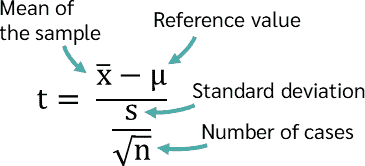

Image from <https://datatab.net/tutorial/t-test>

- In the t-test for independent samples, the difference is calculated from the difference of the two sample means.

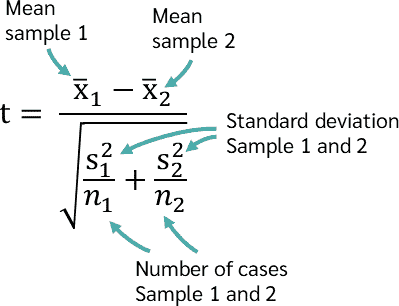

- Image from <https://datatab.net/tutorial/t-test>


## The t-value and checking the null hypothesis

We use the t-test to decide if we reject the null hypothesis or not.

One of two ways:

1. Check the critical t-value from a table, like <https://datatab.net/tutorial/t-distribution>
2. Use the t-value to calculate the [p-value](https://en.wikipedia.org/wiki/P-value)

For method 1. we need the degrees of freedom.



## References

- <https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests>
- <https://builtin.com/data-science/t-test-python>


In [5]:
import scipy.stats as stats
import numpy as np


In [6]:
# Create some random data in two groups

data_group1 = np.array([14, 15, 15, 16, 13, 8, 14,
                        17, 16, 14, 19, 20, 21, 15,
                        15, 16, 16, 13, 14, 12])
data_group2 = np.array([15, 17, 14, 17, 14, 8, 12,
                        19, 19, 14, 17, 22, 24, 16,
                        13, 16, 13, 18, 15, 13])

# Show the variance of both groups
print(np.var(data_group1), np.var(data_group2))


7.727500000000001 12.260000000000002


## Using SciPy

- <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html>


In [7]:
# Two sample t-test with equal variances
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

TtestResult(statistic=-0.6337397070250238, pvalue=0.5300471010405257, df=38.0)

In [15]:
# Example from builtin article.

# Import the necessary libraries:
import seaborn as sns

iris = sns.load_dataset('iris')

# Filter the dataset for two species we want to compare:
setosa = iris[iris['species'] == 'setosa']
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']

setosa_petal_lengths = setosa['petal_length']
versicolor_petal_lengths = versicolor['petal_length']
virginica_petal_lengths = virginica['petal_length']


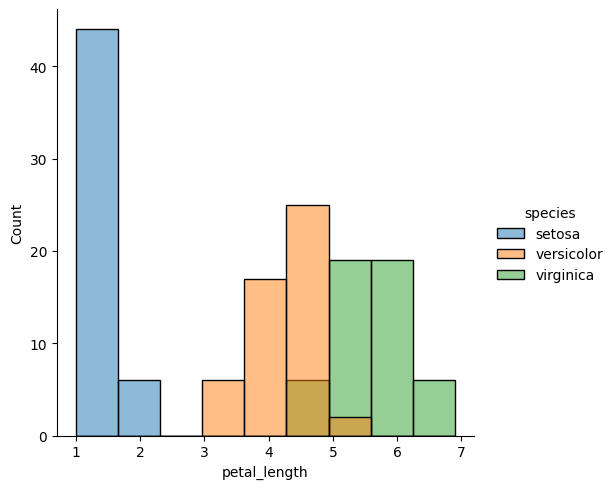

In [14]:
# Show the data for all species
sns.displot(iris, x="petal_length", hue="species")

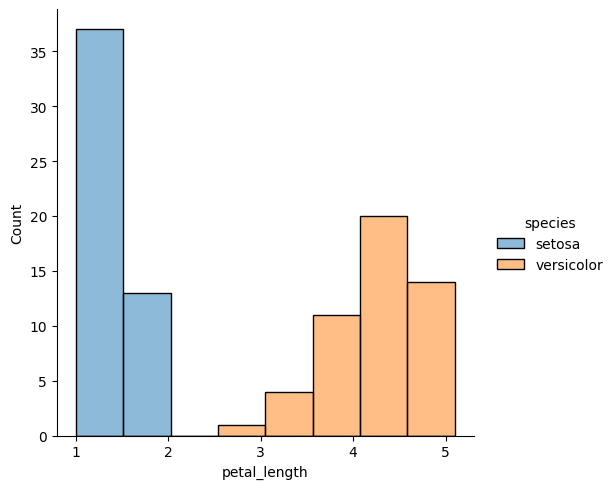

In [13]:
# Show the data for just our two species.

my_species = ['setosa' , 'versicolor']

both_species = iris[iris['species'].isin(my_species)]

sns.displot(both_species, x="petal_length", hue="species")

In [17]:

t_stat, p_value = stats.ttest_ind(setosa_petal_lengths, versicolor_petal_lengths)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

alpha = 0.05  # this is our significance threshold.
if p_value < alpha:
  print("Reject the null hypothesis; there is a significant difference between the petal lengths of Iris setosa and Iris versicolor.")
else:
  print("Fail to reject the null hypothesis; there is no significant difference between the petal lengths of Iris setosa and Iris versicolor.")



t-statistic: -39.492719391538095
p-value: 5.404910513441677e-62
Reject the null hypothesis; there is a significant difference between the petal lengths of Iris setosa and Iris versicolor.


In [19]:
# Let's do the same test for versicolor and virginica

t_stat, p_value = stats.ttest_ind(virginica_petal_lengths, versicolor_petal_lengths)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


alpha = 0.05  # this is our significance threshold.
if p_value < alpha:
  print("Reject the null hypothesis; there is a significant difference between the petal lengths of Iris virginica and Iris versicolor.")
else:
  print("Fail to reject the null hypothesis; there is no significant difference between the petal lengths of Iris virginica and Iris versicolor.")


t-statistic: 12.603779441384985
p-value: 3.1788195478061495e-22
Reject the null hypothesis; there is a significant difference between the petal lengths of Iris virginica and Iris versicolor.
